Prácticas libro de Jordi Torres
-------------------------------

Aquí las prácticas del libro. http://www.jorditorres.org/libro-hello-world-en-tensorflow/


** *Introducción* **


In [1]:
import tensorflow as tf

a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.mul(a, b)

sess = tf.Session()

print( sess.run(y, feed_dict={a: 3, b: 3}) )


9.0


------------------
***Regresión Lineal***

In [2]:
import numpy as np
SEED = 42

num_puntos = 1000
conjunto_puntos = []
for i in range(num_puntos):
    x1 = np.random.default_rng(seed=SEED).normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.default_rng(seed=SEED).normal(0.0, 0.03)
    conjunto_puntos.append([x1, y1])

x_data = [v[0] for v in conjunto_puntos]
y_data = [v[1] for v in conjunto_puntos]


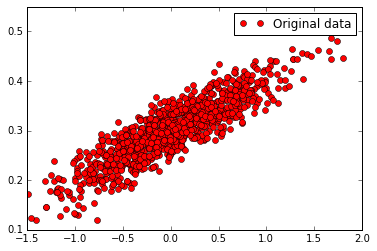

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()


--------------------------

**Diferencia entre placeholder y Variable**

Un placeholder permite pasar datos al grafo mediante feed_dict durante el run.

Una Variable declara un tensor que se modifica durante la ejecución.

**tf.session.run( tensor [,feed_dict])**

Ejecuta un paso de computación con todas las operaciones necesarias del sub-grafo para evaluar tensor.

**optimizer.train dentro de un bucle.**

session.run solo ejecuta un paso de computación.


In [4]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


In [5]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
for step in range(20):
    sess.run(train)
print(step+1, sess.run(W), sess.run(b))


20 [ 0.09943476] [ 0.30122086]


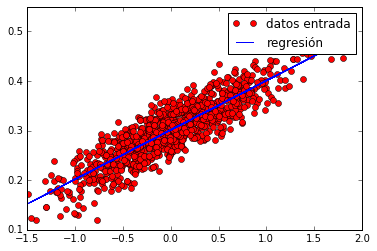

In [6]:
plt.plot(x_data, y_data, 'ro', label='datos entrada')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='regresión')
plt.legend()
plt.show()